In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from config import weather_api_key
from citipy import citipy 
from datetime import datetime

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [3]:
lats = np.random.uniform(-90.000,90.000,1500)
lngs = np.random.uniform(-180.000,180.000,1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
# Now we have a list of tuples we can iterate with
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
len(cities)
    

621

This is basically saying that from the 1500 GCS locations we had, only 620 came from it as there were some repeated that were close to the same random location. Remember that we were trying to come up with more than 500 hundred cities and we did this by setting 1500 GSC locations knowing that almost 70% of the earth is covered with water. The other 30% were our chances of getting a specific city. 

In [6]:
# We can index through all the cities
cities[0]

'cape town'

In [ ]:
# Loop through all the cities in our list
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
        
#     # Create endpoint URL with each city
#     city_url = url + '&q=' + cities[i]

In [ ]:
# The code above would cause trouble when including the city name in the URL, so we use this
# for i, city in enumerate(cities):
#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1

In [7]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.     ")
print("------------------------------")

# Counters for 50 cities in 10 sets for the 500 total
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | berdychiv
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | zhanakorgan
Processing Record 9 of Set 1 | buala
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | kloulklubed
Processing Record 12 of Set 1 | thurso
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | yeppoon
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | ambilobe
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | provideniya
Processing Record 23 of Se

Processing Record 37 of Set 4 | kenai
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | cascais
Processing Record 40 of Set 4 | staicele
Processing Record 41 of Set 4 | moose jaw
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | padang
Processing Record 44 of Set 4 | tarrafal
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | vanimo
Processing Record 48 of Set 4 | kupang
Processing Record 49 of Set 4 | husavik
Processing Record 50 of Set 4 | kralendijk
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | elizabeth city
Processing Record 3 of Set 5 | payakumbuh
Processing Record 4 of Set 5 | myitkyina
Processing Record 5 of Set 5 | mangan
Processing Record 6 of Set 5 | kamaishi
Processing Record 7 of Set 5 | tokur
Processing Record 8 of Set 5 | velsk
Processing Record 9 of Set 5 | bangui
Processing Record 10 of Set 5 | sampit
Processi

Processing Record 28 of Set 8 | sucre
Processing Record 29 of Set 8 | inyonga
Processing Record 30 of Set 8 | karratha
Processing Record 31 of Set 8 | dawei
Processing Record 32 of Set 8 | rockport
Processing Record 33 of Set 8 | torbay
Processing Record 34 of Set 8 | polewali
Processing Record 35 of Set 8 | kahului
Processing Record 36 of Set 8 | ukiah
Processing Record 37 of Set 8 | tomatlan
Processing Record 38 of Set 8 | dvubratskiy
Processing Record 39 of Set 8 | kidal
Processing Record 40 of Set 8 | nerchinskiy zavod
Processing Record 41 of Set 8 | launceston
Processing Record 42 of Set 8 | ugoofaaru
Processing Record 43 of Set 8 | fomboni
Processing Record 44 of Set 8 | iskateley
Processing Record 45 of Set 8 | mundo nuevo
Processing Record 46 of Set 8 | pisco
Processing Record 47 of Set 8 | balkanabat
Processing Record 48 of Set 8 | talcahuano
Processing Record 49 of Set 8 | axim
Processing Record 50 of Set 8 | san luis
Processing Record 1 of Set 9 | lutkun
Processing Record 2 

Processing Record 18 of Set 12 | rognan
Processing Record 19 of Set 12 | artyk
City not found. Skipping...
Processing Record 20 of Set 12 | manadhoo
Processing Record 21 of Set 12 | labuhan
Processing Record 22 of Set 12 | ojinaga
Processing Record 23 of Set 12 | santiago de cao
Processing Record 24 of Set 12 | harper
Processing Record 25 of Set 12 | castelldefels
Processing Record 26 of Set 12 | vryburg
Processing Record 27 of Set 12 | tambul
City not found. Skipping...
Processing Record 28 of Set 12 | grand gaube
Processing Record 29 of Set 12 | liseleje
Processing Record 30 of Set 12 | olafsvik
Processing Record 31 of Set 12 | benghazi
Processing Record 32 of Set 12 | diamantino
Processing Record 33 of Set 12 | manta
Processing Record 34 of Set 12 | nanhai
Processing Record 35 of Set 12 | san rafael
Processing Record 36 of Set 12 | khandyga
Processing Record 37 of Set 12 | avera
Processing Record 38 of Set 12 | mormugao
Processing Record 39 of Set 12 | rewa
Processing Record 40 of S

In [35]:
# To check that the product is a list of dictionaries
#city_data

## We now want to convert it into a data frame

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,60.89,78,75,6.91,ZA,2021-06-15 17:53:32
1,Mar Del Plata,-38.0023,-57.5575,53.01,74,20,11.99,AR,2021-06-15 17:53:32
2,Berdychiv,49.8993,28.6024,62.82,92,17,8.37,UA,2021-06-15 17:53:32
3,Esperance,-33.8667,121.9000,51.64,67,78,15.41,AU,2021-06-15 17:53:33
4,Pevek,69.7008,170.3133,33.57,93,98,6.42,RU,2021-06-15 17:53:33
5,Saskylakh,71.9167,114.0833,53.71,74,53,7.34,RU,2021-06-15 17:50:46
6,Rikitea,-23.1203,-134.9692,74.98,76,27,12.50,PF,2021-06-15 17:53:33
7,Zhanakorgan,43.9098,67.2495,79.11,23,0,9.95,KZ,2021-06-15 17:53:34
8,Buala,-8.1450,159.5921,79.81,83,92,7.61,SB,2021-06-15 17:53:34
9,Punta Arenas,-53.1500,-70.9167,39.31,87,0,3.44,CL,2021-06-15 17:52:34


## To reorder the columns

In [13]:
column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-06-15 17:53:32,-33.9258,18.4232,60.89,78,75,6.91
1,Mar Del Plata,AR,2021-06-15 17:53:32,-38.0023,-57.5575,53.01,74,20,11.99
2,Berdychiv,UA,2021-06-15 17:53:32,49.8993,28.6024,62.82,92,17,8.37
3,Esperance,AU,2021-06-15 17:53:33,-33.8667,121.9000,51.64,67,78,15.41
4,Pevek,RU,2021-06-15 17:53:33,69.7008,170.3133,33.57,93,98,6.42
5,Saskylakh,RU,2021-06-15 17:50:46,71.9167,114.0833,53.71,74,53,7.34
6,Rikitea,PF,2021-06-15 17:53:33,-23.1203,-134.9692,74.98,76,27,12.50
7,Zhanakorgan,KZ,2021-06-15 17:53:34,43.9098,67.2495,79.11,23,0,9.95
8,Buala,SB,2021-06-15 17:53:34,-8.1450,159.5921,79.81,83,92,7.61
9,Punta Arenas,CL,2021-06-15 17:52:34,-53.1500,-70.9167,39.31,87,0,3.44


## To save the df as a CSV and make it a dataset in our working folder

In [11]:
# Create the output file CSV
output_data_file = 'weather_data/cities.csv'
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

# Once created the CSV file, we can work with it and not run the code again

In [15]:
city_data_df = pd.read_csv('weather_data/cities.csv')

In [16]:
# Retrieve relevant fields from df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

Now, using the time module we can create the graphs we want 

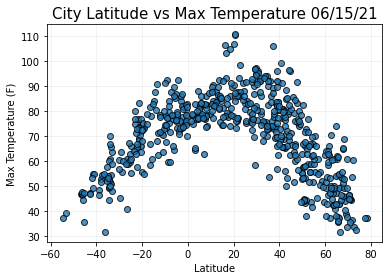

In [24]:
import time

# Create the scatterplot for latitude vs max temperature
plt.scatter(lats, max_temps,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8,label='Cities')
plt.title(f'City Latitude vs Max Temperature '+ time.strftime('%x'),
          fontsize=15)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(alpha=0.2)

plt.savefig('weather_data/Lats_vs_MaxTemp.png')
plt.show()

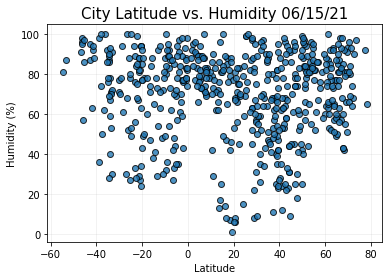

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"),
         fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

plt.savefig("weather_data/Lats_vs_Humidity.png")
plt.show()

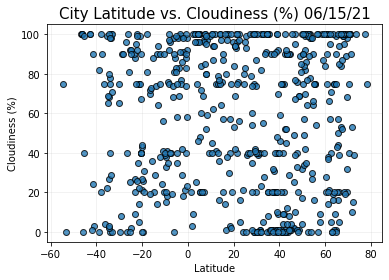

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"),
         fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

plt.savefig("weather_data/Lats_vs_Cloudiness.png")
plt.show()

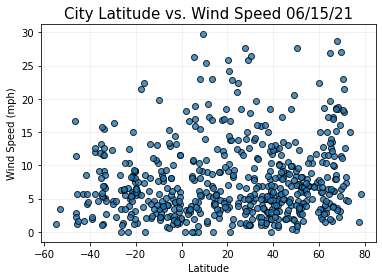

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"),
         fontsize=15)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

plt.savefig("weather_data/Lats_vs_WindSpeed.png")
plt.show()